In [1]:
#simple linear regression
#working on advertising dataset


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [3]:
#to lode dataset
df=pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#to remove Unnamed: 0 column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape #how many record

(200, 4)

In [7]:
#check null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

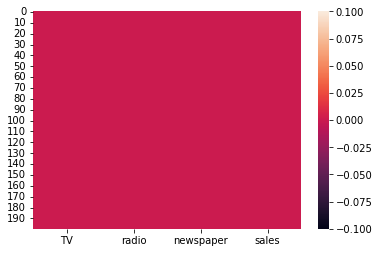

In [8]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
#check datatype
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [10]:
#We predict sales means contineous numerical value means apply regression
#algorithm

In [11]:
#To check relation between input and output
#First check relation between input : TV and output sales with the help of 
#scatter plot

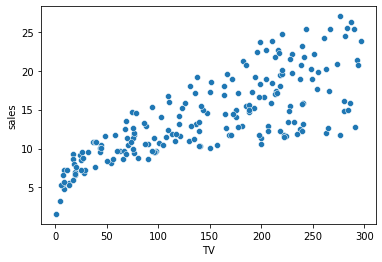

In [12]:
#visualization
#first taking X=TV
x=df["TV"] #input means independent variable
y=df["sales"] #output means dependent variable
sns.scatterplot(x,y)
plt.show()

In [13]:
#Nice upword growth that means as we investment more on TV the sales is also
#increasing that means +ve correlation means good +ve correlation between
#TV(input) with sales(output)

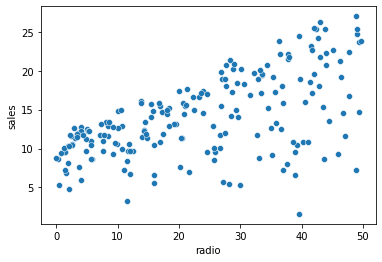

In [14]:
#checking relation of radio with sales
x=df["radio"] #input variable
y=df["sales"] #output variable
sns.scatterplot(x,y)
plt.show()

In [15]:
#see the scatter plot radio with sales : - looks better but lot of data is 
#scattered but scatter data overhere +ve correlation, But correlation is less
#as compared to TV

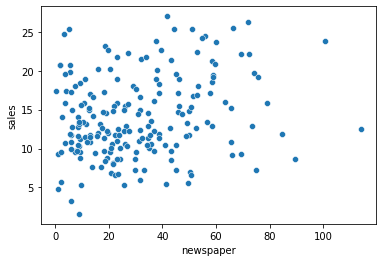

In [16]:
#checking relation of newspaper with sales
x=df["newspaper"] #input variable
y=df["sales"] #output variable
sns.scatterplot(x,y)
plt.show()

In [17]:
#It is very bed correlation means no +ve corr and no -ve corr means no
#correlation newspaper with sales because data point are scattered

In [18]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [19]:
x=['TV', 'radio', 'newspaper']
x

['TV', 'radio', 'newspaper']

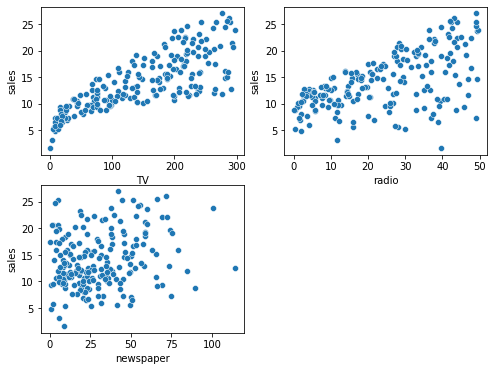

In [20]:
y=df["sales"] #output
plt.figure(figsize=(8,6)) #to increse fig size
for i,col in enumerate(x):
    #print(i," ",col)
    plt.subplot(2,2,i+1) #subplot(row,cols,index+1)
    sns.scatterplot(df[col],y)
plt.show()

In [21]:
#to check correlation between input and output
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


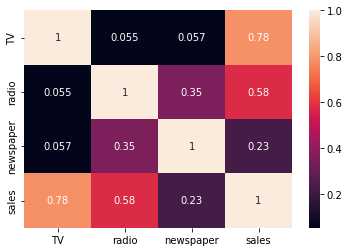

In [22]:
#to check correlation by visualization
sns.heatmap(df.corr(),annot=True)
plt.show()


#correlation values with TV and sales=0.78 , It is very good
#correlation values with radio and sales=0.58 , It is good(ok)
#correlation values with newspaper and sales=0.23 , It is very bad

In [23]:
#Performing the modeling 
#Modeling with input : TV and output sales 
#SLR : only one input
#Select input and output from dataset

In [24]:
#Select Input and output from dataset
X=df[["TV"]] #input means independent variable (input always 2D array)
Y=df["sales"]

In [25]:
X.shape

(200, 1)

In [26]:
#train_test_split() : inbuilt  function It is used to split dataset 
#into training and testing , 70% data use in training and 30% data used in
#testing
#train_test_split()  : this function define in inbuilt class
#train_test_split class



from sklearn.model_selection import train_test_split

In [27]:
#creating object of train_test+_split class
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [28]:
X_train.shape

(140, 1)

In [29]:
X_test.shape

(60, 1)

In [30]:
Y_train.shape

(140,)

In [31]:
Y_test.shape

(60,)

In [32]:
X_train.head(10)

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4
5,8.7
127,80.2
105,137.9
48,227.2
66,31.5


In [33]:
X_test.head()

,TV
58,210.8
40,202.5
34,95.7
102,280.2
184,253.8


In [34]:
Y_train.head(10)

116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
5       7.2
127     8.8
105    19.2
48     14.8
66      9.5
Name: sales, dtype: float64

In [35]:
#performing linear Regression Algorithm
#call inbuilt class LinearRegression
from sklearn.linear_model import LinearRegression

In [36]:
#creating object of linearRegresssion
lr=LinearRegression()

# FIT, PREDICT, REPORT

In [37]:
#train model with 70% of data use fit() method of LinearRegression
lr.fit(X_train,Y_train)


LinearRegression()

In [38]:
#checking slope/gradient/coefficient and intercept then use
m=lr.coef_
print("Slope : ",m)
c=lr.intercept_
print("Intecept : ",c)
#coef_ and intercept_ both are inbuilt method of LinearRegression class

Slope :  [0.04812204]
Intecept :  6.923519536059553


In [39]:
#testing the model : use inbuilt method predict of LinearRegression class
#equation of straight line = y_predict=m*X+c
Y_pred=lr.predict(X_test)

In [40]:
Y_pred

array([17.06764591, 16.66823297, 11.52879892, 20.4073156 , 19.1368937 ,
       20.57093054, 14.78184893, 15.62398466, 10.32093567, 17.2890073 ,
       14.83959538, 10.25356482, 17.25532187, 12.20731971, 17.78947654,
       12.97246017, 13.26119242, 20.91259704,  8.1554438 , 17.06283371,
       11.75497252, 10.18619396,  8.13138278, 12.09182681, 12.35649804,
       15.98971218,  8.99757953, 18.89628349, 14.95027608, 18.47762173,
       18.46799732, 18.2081383 , 14.12738917, 15.11389102, 18.87703468,
       15.82128503, 17.62586159, 13.15051172, 17.35637816,  7.86671155,
        7.55391828, 11.2737521 ,  7.82340171, 16.74522823,  7.27481044,
       14.01189627, 10.68666319, 17.89534503, 16.78853807, 17.96752809,
       20.864475  , 12.84734286,  7.85708714, 15.71060434, 19.70473379,
       14.89252963, 17.43818563,  8.12657058, 18.0926454 ,  8.99276733])

In [41]:
Y_test.head(10)

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
Name: sales, dtype: float64

In [42]:
#creading a DataFrame to see both recod simaltainously which will hold y_test,y_predict,x_test
dic={"Y_test": Y_test,"Y_pred":Y_pred}
#print(dic)
#creating dataframe
df_result=pd.DataFrame(dic)
#to add X_test in dataframe
df_result["X_test"]=X_test #x_test is a 2d input hence cannot add with 1d output arry in dataframe hence first created dic 
#of 1d and made it 2d and then  added 2d X_test value
df_result

,Y_test,Y_pred,X_test
58,23.8,17.067646,210.8
40,16.6,16.668233,202.5
34,9.5,11.528799,95.7
102,14.8,20.407316,280.2
184,17.6,19.136894,253.8
198,25.5,20.570931,283.6
95,16.9,14.781849,163.3
4,12.9,15.623985,180.8
29,10.5,10.320936,70.6
168,17.1,17.289007,215.4


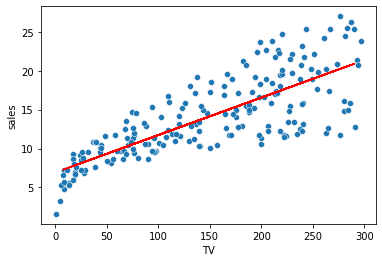

In [43]:
#visualize
sns.scatterplot(df["TV"],df["sales"])
plt.plot(X_test,Y_pred,c="red") #line always 30% testing data
plt.show()

In [44]:
#Evaluation of Model
from sklearn.metrics import mean_squared_error
e1=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error for TV vs Sales = ",e1)

Mean Squared Error for TV vs Sales =  10.571057434656955


# Root Mean Squared Error

In [45]:
RMSE=np.sqrt(e1)
print(" Root Mean Squared Error for TV vs Sales = ",RMSE)

 Root Mean Squared Error for TV vs Sales =  3.251316261863333


In [46]:
#Evalution of model : find r2-score means r-squared (0-1)
#r2-score : check model is best perform or not
#r2_score inbuilt class which define in sklearn.metrics
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)#just fine means ok nod good not bad

0.575061860494331

In [47]:
#Performing the modeling With the help of Simple Linear Regression 
#Modeling With input radio and target sales
#Step 1: First input means X and output Y(target)
X=df[["radio"]] #always input 2D [[]]
Y=df["sales"] #always output means target 1D

In [48]:
#creating object of train_test+_split class
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [49]:
#creating object of linearRegresssion
lr1=LinearRegression()#creating object of train_test+_split class
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [50]:
#train model with 70% of data use fit() method of LinearRegression
lr1.fit(X_train,Y_train)


LinearRegression()

In [51]:
#test model with 30%data
Y_pred=lr1.predict(X_test)

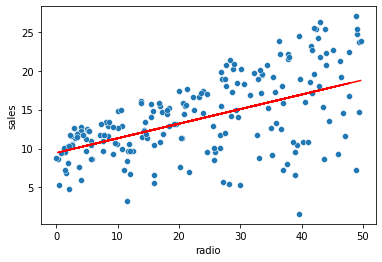

In [52]:
#visualise
sns.scatterplot(df["radio"],df["sales"])
plt.plot(X_test,Y_pred,c="red")
plt.show()

In [53]:
#mean squared error
e2=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error for radio vs Sales = ",e2)

Mean Squared Error for radio vs Sales =  14.604130559272193


In [54]:
RMSE1=np.sqrt(e2)
print(" Root Mean Squared Error for radio vs Sales = ",RMSE1)

 Root Mean Squared Error for radio vs Sales =  3.8215351050686674


In [55]:
#R2_Score
r2_score(Y_test,Y_pred)

0.41293932917162335

In [56]:
#checking slope/gradient/coefficient and intercept then use
m=lr1.coef_
print("Slope : ",m)
c=lr1.intercept_
print("Intecept : ",c)
#coef_ and intercept_ both are inbuilt method of LinearRegression class

Slope :  [0.1874808]
Intecept :  9.440936561425884


In [57]:
#Performing the modeling With the help of Simple Linear Regression 
#Modeling With input radio and target sales
#Step 1: First input means X and output Y(target)
X=df[["newspaper"]] #always input 2D [[]]
Y=df["sales"] #always output means target 1D

In [58]:
#creating object of train_test+_split class
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [59]:
#creating object of linearRegresssion
lr2=LinearRegression()

In [60]:
#train model with 70% of data use fit() method of LinearRegression
lr2.fit(X_train,Y_train)


LinearRegression()

In [61]:
#test model with 30%data
Y_pred=lr2.predict(X_test)

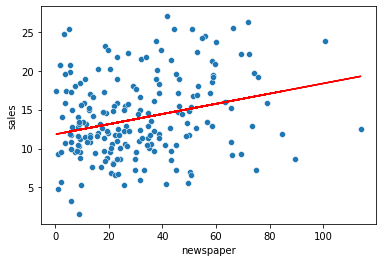

In [62]:
#visualise
sns.scatterplot(df["newspaper"],df["sales"])
plt.plot(X_test,Y_pred,c="red")
plt.show()

In [63]:
#mean squared error
e3=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error for newspaper vs Sales = ",e3)

Mean Squared Error for newspaper vs Sales =  25.49745237441493


In [64]:
RMSE2=np.sqrt(e3)
print(" Root Mean Squared Error for radio vs Sales = ",RMSE2)

 Root Mean Squared Error for radio vs Sales =  5.049500210358935


In [65]:
#R2_Score
r2_score(Y_test,Y_pred)

-0.024953278429509007

In [66]:
#checking slope/gradient/coefficient and intercept then use
m=lr2.coef_
print("Slope : ",m)
c=lr2.intercept_
print("Intecept : ",c)
#coef_ and intercept_ both are inbuilt method of LinearRegression class

Slope :  [0.06532045]
Intecept :  11.82966888487788


In [67]:
''' 
slope of TV : 0.04812204  and MSE of TV  :  10.571057434656955 r2-score=0.578
slope of radio :0.1874808 and MSE of radio : 14.604130559272193 r2-score=0.41
slope of newspaper : 0.06532045 and MSE of newspaper :25.49745237441493 r2=-0.02
'''

' \nslope of TV : 0.04812204  and MSE of TV  :  10.571057434656955 r2-score=0.578\nslope of radio :0.1874808 and MSE of radio : 14.604130559272193 r2-score=0.41\nslope of newspaper : 0.06532045 and MSE of newspaper :25.49745237441493 r2=-0.02\n'

In [68]:
#multiple linear regression means many input but output only one 
#Equation of MLR  :   Y_pred=m1X1+m2X2+m3X3+......+mnXn+b
#select input and output from dataset : df
X=df[["TV","radio","newspaper"]]#Input 2D
Y=df["sales"]#output 1D

In [69]:
#creating object of train_test+_split class
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [70]:
X_train.head()

,TV,radio,newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8


In [71]:
#creating object of linearRegresssion
lr=LinearRegression()

In [72]:
lr.fit(X_train,Y_train)
#train model uising fit()

LinearRegression()

In [73]:
#checking slope/gradient/coefficient and intercept then use
m=lr.coef_
print("Slope : ",m)
c=lr.intercept_
print("Intecept : ",c)
#coef_ and intercept_ both are inbuilt method of LinearRegression class

Slope :  [0.04695205 0.17658644 0.00185115]
Intecept :  2.937215734690609


In [74]:
X_test.head()

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [75]:
#testing data with 30% data
Y_pred=lr.predict(X_test) #Y=m1*TV+m2*radio+m3*newspaper+c

In [76]:
#mean squared error
mean_squared_error(Y_test,Y_pred)

1.928924907466573

In [77]:
#r2_score
r2_score(Y_test,Y_pred)

0.9224605706201434

In [78]:
#here r2-score is best because nearest to +1 and MSE is very low means we
#create a successful model

# Assumption of Linear Regression

In [79]:
'''1. should not be Multicolinearity in linear regression  
 Solve this assumption .means we removed the Multicolinearity situation
 2. Assumption :  Linear relationship means There should be a linear relation
 ship. 
 when does linear regression  do best work ? 
 where got better relationship 
 
 we cannot see 3D graph on system so we have some hack(trick) , how to 
 check input and output both are related or not
 we calculate the residual (this is error means 
 Residual =(actual output-predicted output)
 '''

'1. should not be Multicolinearity in linear regression  \n Solve this assumption .means we removed the Multicolinearity situation\n 2. Assumption :  Linear relationship means There should be a linear relation\n ship. \n when does linear regression  do best work ? \n where got better relationship \n \n we cannot see 3D graph on system so we have some hack(trick) , how to \n check input and output both are related or not\n we calculate the residual (this is error means \n Residual =(actual output-predicted output)\n '

In [80]:
'''
1. should not be Multicolinearity in linear regression  
Solve this assumption .means we removed the Multicolinearity situation
'''

'\n1. should not be Multicolinearity in linear regression  \nSolve this assumption .means we removed the Multicolinearity situation\n'

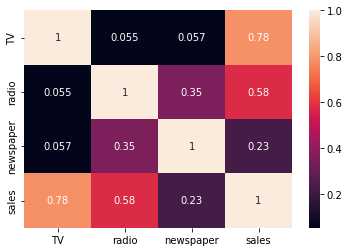

In [81]:
#for multicolinearity : check coorelation between input
sns.heatmap(df.corr(),annot=True)
plt.show()

In [82]:
#here input radio and newspaper both are corelated each other value of corr 
#between radio and newspaper =0.35 means multicolinearity situation occurs
#so check corr of both input radio and newspapaer with o/p and remove those 
#input column whose corr value with o/p will be less 
#here newspaper is less correlated with o/p sales as compared to radio with
#sales so remove newspaper from dataset 
#and perform TV and radio with sales

In [83]:
#we take input TV and radio and output as sales
x=df[["TV","radio"]]
y=df["sales"]

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [85]:
X_train.head()

,TV,radio
116,139.2,14.3
67,139.3,14.5
78,5.4,29.9
42,293.6,27.7
17,281.4,39.6


In [86]:
#creating object of leanear regression
lr=LinearRegression()

In [87]:
#training the model
lr.fit(X_train,Y_train)

LinearRegression()

In [88]:
#checking slope and intercept
print("slope= ",lr.coef_)
print("intercept= ",lr.intercept_)

slope=  [0.04697554 0.17765046]
intercept=  2.9647671191401574


In [89]:
#testing the model
Y_pred=lr.predict(X_test)

In [90]:
#mean squared error
mean_squared_error(Y_test,Y_pred)

1.9147050289721805

In [91]:
#r2_score
r2_score(Y_test,Y_pred)

0.92303218502568

In [92]:
#Solve 3rd assumption of linear regression (no Multicolinearity)

In [93]:
#Work on 1st and 2nd Assumption of Linear Regression 
#1. there should be a linear relationship
#2. if occur linear relation then next check relation is homoskedatik 
#not a heteroskedastik

In [94]:
#check linear relation between input and output
#use some tricks
#find residual
residual=Y_test-Y_pred
residual

58     2.121325
40     0.161080
34     1.790963
102   -3.121584
184   -1.071115
198    1.751649
95     0.650372
4     -0.476570
29     1.376352
168   -0.175850
171    0.094861
18     1.442691
11     0.085973
89     0.085626
110   -1.628579
118    0.475105
159    0.479785
35    -4.548925
136   -1.595709
59     0.296797
51     1.313444
16    -0.151716
44    -0.209470
94     1.002953
31     0.540576
162   -0.130433
38     0.367320
28    -0.566610
193    1.338393
27    -1.310358
47     1.593306
165   -2.684544
194    0.978638
177   -0.645678
176    0.201464
97     0.118795
174   -2.516140
73     0.943990
69     1.352080
172    0.143738
108    1.648793
107    1.435349
189    0.707220
14     0.602824
56    -2.799666
19     0.469889
114   -0.352296
39     1.127387
185    1.993211
124    0.216236
98     1.311803
123    0.305838
119   -0.118500
53     1.450047
33    -1.594481
179    0.079578
181   -1.988236
106    1.106689
199   -1.995585
138    0.014138
Name: sales, dtype: float64

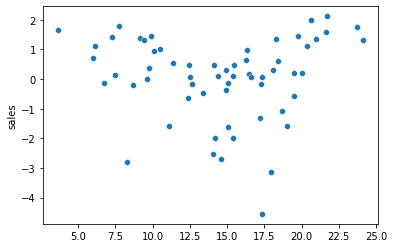

In [95]:
#Visualize scatterplot between y_pred and residual means here input=Y_pred and y(output)=residual
#because residual deends on Y_red value
plt.figure()
sns.scatterplot(Y_pred,residual)
plt.show()

In [96]:
# in above scatterplot, This is not a linear relation between Y_pred
# and residuel means no relation between x=["TV","radio"] with sales o/p
#means this assumption is not fullfill

##2. Assumption :  if occur linear relation then next check relation is 
#homoskedatik not a heteroskedastik but no found any linear relation means
#not satify 2nd assumption

#means 2nd Assumption totally depend on First Assumption

In [97]:
#4. Assumption of linear regression : - Residual should be normally distributed
#curve means data should be euqally divide on both sides.
#normal distributed curve then use inbuilt function displot() of seaborn
#library ,distplot is also known as frequency graph
#use distplot()

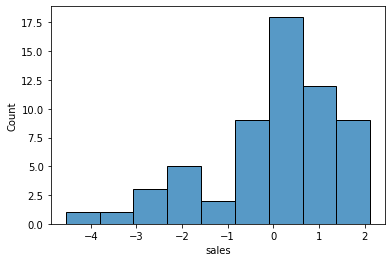

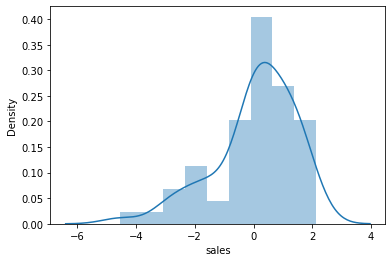

-1.0935181639447333

In [98]:
sns.histplot(residual)
plt.show()
sns.distplot(residual)
plt.show()
#check skewness
residual.skew()

# Demo of PLR

In [99]:
#demo of PLR
#take degree of input =1 then equation Y=mx+c means receive straight line
#if degree of input =1 then linear equation 
#first create a user defined function
def poly_1(X): #here X is a 1D numpy array
    m=4 #suppose
    c=5 #suppose
    Y=m*X+c
    return Y

In [100]:
#main program
#create a 1D numpy array
X=np.arange(-100,100)  #start =-100 stop=99 step=+1
#print(X)
#call function 
Y=poly_1(X)
#print(Y)
#create dictionary
dic={'Ínput_X':X,'Output_Y':Y}
P=pd.DataFrame(dic)
print(P)

     Ínput_X  Output_Y
0       -100      -395
1        -99      -391
2        -98      -387
3        -97      -383
4        -96      -379
..       ...       ...
195       95       385
196       96       389
197       97       393
198       98       397
199       99       401

[200 rows x 2 columns]


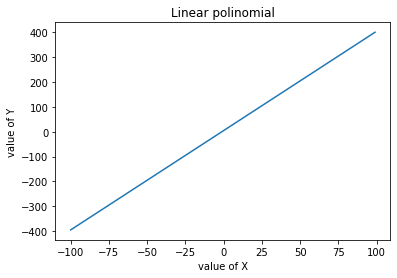

In [101]:
plt.plot(X,Y)
plt.title("Linear polinomial")
plt.xlabel("value of X")
plt.ylabel("value of Y")
plt.show()

In [102]:
#increasing the degree to x=2
#then equation is a quadratic equation:= ax^2+bx=c=0
#equation Y=m1*X^2+m2*X^1+c
#create a user defined function for degree=2

def poly_2(X):
    m1=6
    m2=4
    c=5
    y=m1*(X**2)+m2*X+c
    return y

In [103]:
#calling the function
#main program
#create a 1D numpy array
X=np.arange(-100,100)  #start =-100 stop=99 step=+1
#print(X)
#call function 
Y=poly_2(X)
#print(Y)
#create dictionary
dic={'Ínput_X':X,'Output_Y':Y}
P=pd.DataFrame(dic)
print(P)

     Ínput_X  Output_Y
0       -100     59605
1        -99     58415
2        -98     57237
3        -97     56071
4        -96     54917
..       ...       ...
195       95     54535
196       96     55685
197       97     56847
198       98     58021
199       99     59207

[200 rows x 2 columns]


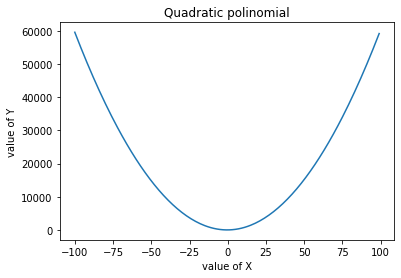

In [104]:
#visualizing
plt.plot(X,Y)
plt.title("Quadratic polinomial")
plt.xlabel("value of X")
plt.ylabel("value of Y")
plt.show()

In [105]:
#increasing the degree of input X=3
#then equition is a cubic equation:= ax^3+bx^2+cx^1+d=0
#equation Y=m1*X^3+m2*X^2+m3*X+c
#create a user defined function for degree=3

def poly_3(X):
    m1=8
    m2=6
    m3=4
    c=5
    y=m1*(X**3)+m2*(X**2)+m3*X+c
    return y

In [106]:
#calling the function
#main program
#create a 1D numpy array
X=np.arange(-100,100)  #start =-100 stop=99 step=+1
#print(X)
#call function 
Y=poly_3(X)
#print(Y)
#create dictionary
dic={'Ínput_X':X,'Output_Y':Y}
P=pd.DataFrame(dic)
print(P)

     Ínput_X  Output_Y
0       -100  -7940395
1        -99  -7703977
2        -98  -7472299
3        -97  -7245313
4        -96  -7022971
..       ...       ...
195       95   6913535
196       96   7133573
197       97   7358231
198       98   7587557
199       99   7821599

[200 rows x 2 columns]


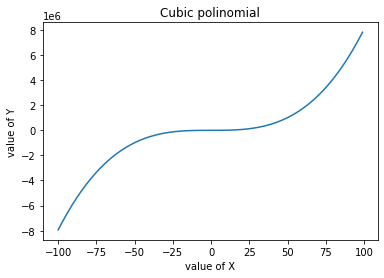

In [107]:
plt.plot(X,Y)
plt.title("Cubic polinomial")
plt.xlabel("value of X")
plt.ylabel("value of Y")
plt.show()

# Back to DataSet

In [108]:
#Increase degree of input of our dataset 
#Input : TV and radio means X1=TV X2=radio  and output Y=sales
#Y=m1*(X1*2)+m2(X1*1)+m3(X2*2)+m4(X2**1)+c
#equation Y=m1*TV*2+m2*TV+m3*radio*2+m4*radio+b
#we work on dataset 
#apply polynomial linear regression means increase the degree of independent
#variable X means degree=2 
#equation : ax2+bx+c=0  here 2 inputs ax1*2+bx1+cx2*2+dx2+e
#here we have 2 inputs : - X=TV,radio means X1="TV" and X2="radio"
#eq. m1*TV*2+m2*TV1+m3*radio2+m4*radio*1+b

In [109]:
#select input and output
X=df[["TV","radio"]] #2D 
Y=df["sales"]#1D

In [110]:
#call PolynomialFeatures inbuilt class which define in sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [111]:
#creating object of polynomialfeatures and pass degree
pf=PolynomialFeatures(3)

In [112]:
x_poly=pf.fit_transform(X)
#we create polynomial version of x so we call fit_transform() : inbuilt
#method of polynomialfeatures class

In [113]:
x_poly

array([[1.00000000e+00, 2.30100000e+02, 3.78000000e+01, ...,
        2.00135918e+06, 3.28776084e+05, 5.40101520e+04],
       [1.00000000e+00, 4.45000000e+01, 3.93000000e+01, ...,
        7.78238250e+04, 6.87298050e+04, 6.06984570e+04],
       [1.00000000e+00, 1.72000000e+01, 4.59000000e+01, ...,
        1.35790560e+04, 3.62371320e+04, 9.67025790e+04],
       ...,
       [1.00000000e+00, 1.77000000e+02, 9.30000000e+00, ...,
        2.91359700e+05, 1.53087300e+04, 8.04357000e+02],
       [1.00000000e+00, 2.83600000e+02, 4.20000000e+01, ...,
        3.37801632e+06, 5.00270400e+05, 7.40880000e+04],
       [1.00000000e+00, 2.32100000e+02, 8.60000000e+00, ...,
        4.63285526e+05, 1.71661160e+04, 6.36056000e+02]])

In [114]:
#train test split
X_train,X_test,Y_train,Y_test=train_test_split(x_poly,Y,test_size=0.3,random_state=1)

In [115]:
#we train the model with 70% data using LinearRegression class
#creating object
lr=LinearRegression()


In [116]:
#traing data
lr.fit(X_train,Y_train)

LinearRegression()

In [117]:
#predicting data
Y_pred=lr.predict(X_test)

In [118]:
#mean squared error
print("Mean Squared Error = ",mean_squared_error(Y_test,Y_pred))

Mean Squared Error =  0.14469078647701475


In [119]:
#R2_score
print("R2_Score = ",r2_score(Y_test,Y_pred))

R2_Score =  0.9941836818133654


In [120]:
#checking slope and intercept
print("Slope = ",lr.coef_)
print("Intercept = ",lr.intercept_)

Slope =  [ 0.00000000e+00  9.16483199e-02  2.25347616e-02 -4.65701531e-04
  1.30652795e-03 -1.62567917e-04  8.31531755e-07 -7.44270012e-07
 -1.18928234e-06  9.37589630e-06]
Intercept =  4.162147477105858


In [121]:
#check linear relation between input and output
#creating normal distribution curve using residual
#find residual
residual=Y_test-Y_pred
residual

58    -0.041888
40     0.445638
34    -0.093118
102   -0.065757
184    0.179460
198    0.027800
95    -0.197140
4     -0.023023
29     0.143746
168    0.245208
171   -0.308870
18     0.530108
11     0.459830
89    -0.871036
110    0.445780
118   -0.579427
159   -0.447708
35    -0.460786
136    0.856041
59     0.131923
51    -0.196747
16    -0.069882
44     0.875771
94    -0.292173
31    -0.623031
162    0.126614
38     0.692022
28    -0.064441
193   -0.038868
27     0.253143
47     0.308808
165    0.158161
194   -0.097822
177   -0.394323
176    0.327206
97     0.126910
174   -0.092242
73    -0.037799
69    -0.187360
172    0.851225
108   -0.000472
107   -0.596018
189    0.426741
14     0.072516
56    -0.279619
19    -0.302362
114   -0.303319
39     0.288186
185    0.338592
124   -0.026599
98    -0.569396
123   -0.710938
119    0.076575
53    -0.262732
33    -0.056169
179    0.097471
181    0.111519
106    0.433444
199    0.226478
138    0.269316
Name: sales, dtype: float64

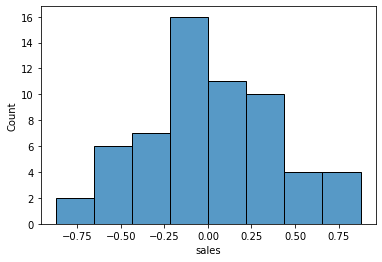

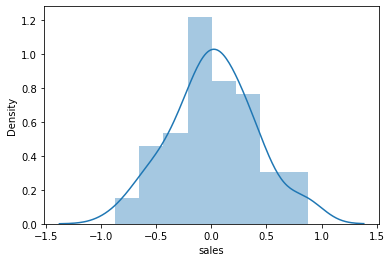

0.07135639609463926

In [122]:
sns.histplot(residual)
plt.show()
sns.distplot(residual)
plt.show()
#checking skewness
residual.skew()

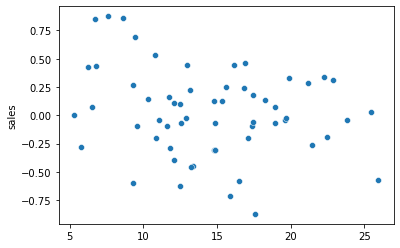

In [123]:
#there should be linear relation in scatter plot
plt.figure()
sns.scatterplot(Y_pred,residual)
plt.show()

In [ ]:
#if take degree of input =3 then 
#here this is linear relation ship between residuals and Y_pred 
#means input and output are related to each other
#but datpoints are scattered means heteroskadastic but should be homoskedastik
#means datapoints are close each other